In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
all_data_df = pd.read_excel('/Users/eveyhuang/Documents/NICO/gemini_code/data/all_data_df_sm.xlsx')

In [3]:
# Define feature columns (exclude outcome variables and identifiers)
feature_cols = [col for col in all_data_df.columns if col not in 
                ['conference', 'session', 'num_teams', 'num_funded_teams', 'has_teams', 'has_funded_teams']]
print(feature_cols)

['num_members', 'meeting_length', 'num_interruption', 'percent_time_screenshare', 'num_idea_management', 'num_information_seeking', 'num_knowledge_sharing', 'num_evaluation_practices', 'num_relational_climate', 'num_participation_dynamics', 'num_coordination_decision', 'num_integration_practices', 'mean_score_idea_management', 'mean_score_information_seeking', 'mean_score_knowledge_sharing', 'mean_score_evaluation_practices', 'mean_score_relational_climate', 'mean_score_participation_dynamics', 'mean_score_coordination_decision', 'mean_score_integration_practices', 'negative_utterance_ratio', 'positive_intensity', 'num_facilitator', 'facilitator_dominance_ratio', 'facilitator_average_score']


In [6]:
# remove outlier : teams = 8 and funded_teams = 4
all_data_df = all_data_df[all_data_df['num_teams'] < 8]

## Check distribuion and relationship with outcome variables

Creating feature visualizations...
Processing feature 1/25: num_members
Processing feature 2/25: meeting_length
Processing feature 3/25: num_interruption
Processing feature 4/25: percent_time_screenshare
Processing feature 5/25: num_idea_management
Processing feature 6/25: num_information_seeking
Processing feature 7/25: num_knowledge_sharing
Processing feature 8/25: num_evaluation_practices
Processing feature 9/25: num_relational_climate
Processing feature 10/25: num_participation_dynamics
Processing feature 11/25: num_coordination_decision
Processing feature 12/25: num_integration_practices
Processing feature 13/25: mean_score_idea_management
Processing feature 14/25: mean_score_information_seeking
Processing feature 15/25: mean_score_knowledge_sharing
Processing feature 16/25: mean_score_evaluation_practices
Processing feature 17/25: mean_score_relational_climate
Processing feature 18/25: mean_score_participation_dynamics
Processing feature 19/25: mean_score_coordination_decision
Pr

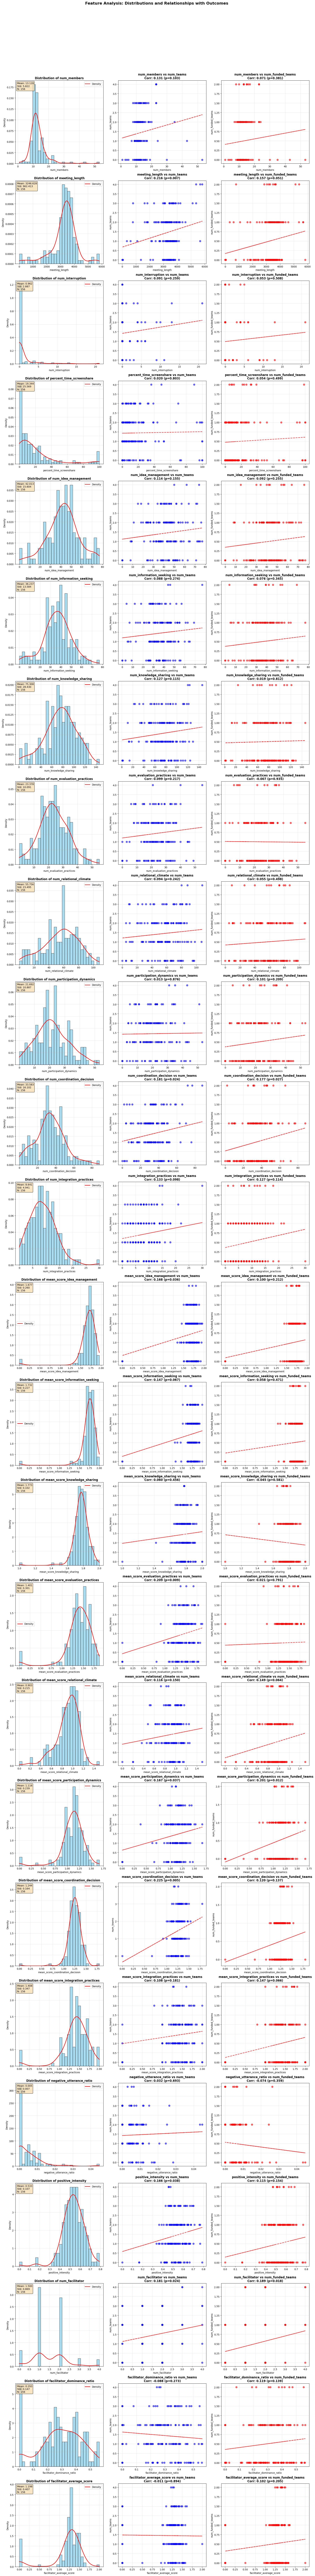

Visualization saved as 'feature_analysis_comprehensive.png'


In [7]:
# distribution and two way scatter 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

def create_feature_visualizations(df, feature_cols, outcome_vars=['num_teams', 'num_funded_teams']):
    """
    Create comprehensive visualizations for each feature:
    1. Distribution plot (histogram + density)
    2. Scatter plot vs num_teams
    3. Scatter plot vs num_funded_teams
    """
    
    # Calculate number of rows needed (3 plots per feature)
    n_features = len(feature_cols)
    n_cols = 3  # distribution, scatter1, scatter2
    n_rows = n_features
    
    # Create the main figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_features))
    fig.suptitle('Feature Analysis: Distributions and Relationships with Outcomes', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    for i, feature in enumerate(feature_cols):
        print(f"Processing feature {i+1}/{n_features}: {feature}")
        
        # Get the data for this feature
        feature_data = df[feature].dropna()
        
        # Skip if no valid data
        if len(feature_data) == 0:
            print(f"  Skipping {feature}: No valid data")
            continue
            
        # 1. Distribution plot (left column)
        ax1 = axes[i, 0]
        
        # Create histogram and density plot
        ax1.hist(feature_data, bins=30, alpha=0.7, density=True, color='skyblue', edgecolor='black')
        
        # Add density curve
        try:
            from scipy.stats import gaussian_kde
            kde = gaussian_kde(feature_data)
            x_range = np.linspace(feature_data.min(), feature_data.max(), 100)
            ax1.plot(x_range, kde(x_range), 'r-', linewidth=2, label='Density')
        except:
            pass
        
        ax1.set_title(f'Distribution of {feature}', fontweight='bold')
        ax1.set_xlabel(feature)
        ax1.set_ylabel('Density')
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        
        # Add statistics text
        stats_text = f'Mean: {feature_data.mean():.3f}\nStd: {feature_data.std():.3f}\nN: {len(feature_data)}'
        ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        # 2. Scatter plot vs num_teams (middle column)
        ax2 = axes[i, 1]
        
        # Create scatter plot
        scatter = ax2.scatter(df[feature], df['num_teams'], alpha=0.6, s=50, c='blue')
        
        # Add trend line
        try:
            z = np.polyfit(df[feature].dropna(), df['num_teams'].dropna(), 1)
            p = np.poly1d(z)
            ax2.plot(df[feature].dropna(), p(df[feature].dropna()), "r--", alpha=0.8, linewidth=2)
        except:
            pass
        
        # Calculate correlation
        try:
            corr, p_val = stats.pearsonr(df[feature].dropna(), df['num_teams'].dropna())
            ax2.set_title(f'{feature} vs num_teams\nCorr: {corr:.3f} (p={p_val:.3f})', fontweight='bold')
        except:
            ax2.set_title(f'{feature} vs num_teams', fontweight='bold')
        
        ax2.set_xlabel(feature)
        ax2.set_ylabel('num_teams')
        ax2.grid(True, alpha=0.3)
        
        # 3. Scatter plot vs num_funded_teams (right column)
        ax3 = axes[i, 2]
        
        # Create scatter plot
        scatter = ax3.scatter(df[feature], df['num_funded_teams'], alpha=0.6, s=50, c='red')
        
        # Add trend line
        try:
            z = np.polyfit(df[feature].dropna(), df['num_funded_teams'].dropna(), 1)
            p = np.poly1d(z)
            ax3.plot(df[feature].dropna(), p(df[feature].dropna()), "r--", alpha=0.8, linewidth=2)
        except:
            pass
        
        # Calculate correlation
        try:
            corr, p_val = stats.pearsonr(df[feature].dropna(), df['num_funded_teams'].dropna())
            ax3.set_title(f'{feature} vs num_funded_teams\nCorr: {corr:.3f} (p={p_val:.3f})', fontweight='bold')
        except:
            ax3.set_title(f'{feature} vs num_funded_teams', fontweight='bold')
        
        ax3.set_xlabel(feature)
        ax3.set_ylabel('num_funded_teams')
        ax3.grid(True, alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()
    
    return fig

# Create the visualizations
print("Creating feature visualizations...")
fig = create_feature_visualizations(all_data_df, feature_cols)

# Save the figure
fig.savefig('feature_analysis_comprehensive.png', dpi=300, bbox_inches='tight')
print("Visualization saved as 'feature_analysis_comprehensive.png'")

## Check multicolinearity and address

In [10]:
# Check data types and basic statistics
print("Data types and basic statistics:")
print(all_data_df[feature_cols].dtypes.value_counts())
print("\nBasic statistics:")
print(all_data_df[feature_cols].describe())

Data types and basic statistics:
int64      18
float64    15
Name: count, dtype: int64

Basic statistics:
       num_interruption  percent_time_screenshare  num_idea_management  \
count        157.000000                157.000000           157.000000   
mean           0.955414                 19.270456            42.324841   
std            2.878621                 25.503108            16.038102   
min            0.000000                  0.000000             0.000000   
25%            0.000000                  2.292523            35.000000   
50%            0.000000                  9.858765            43.000000   
75%            0.000000                 23.676640            51.000000   
max           21.000000                100.000000            91.000000   

       num_information_seeking  num_knowledge_sharing  \
count               157.000000             157.000000   
mean                 36.433121              75.694268   
std                  13.761370              28.749730   

In [16]:

# Define feature columns (exclude outcome variables and identifiers)
feature_cols = [col for col in all_data_df.columns if col not in 
                ['conference', 'session', 'num_teams', 'num_funded_teams', 'has_teams', 
                'has_funded_teams','num_members', 'meeting_length']]

# Check for missing values
print("Missing values per column:")
print(all_data_df[feature_cols].isnull().sum())


# Check multicollinearity using VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) 
                       for i in range(len(features))]
    return vif_data

# Calculate VIF for all features
vif_results = calculate_vif(all_data_df, feature_cols)
print("\nVIF Results:")
print(vif_results.sort_values('VIF', ascending=False))

# Remove features with VIF > 10 (high multicollinearity)
high_vif_features = vif_results[vif_results['VIF'] > 10]['Feature'].tolist()
print(f"\nFeatures with VIF > 10 (high multicollinearity): {high_vif_features}")

# Create final feature set
final_features = [col for col in feature_cols if col not in high_vif_features]
print(f"\nFinal feature set ({len(final_features)} features): {final_features}")

Missing values per column:
num_interruption                     0
percent_time_screenshare             0
num_idea_management                  0
num_information_seeking              0
num_knowledge_sharing                0
num_evaluation_practices             0
num_relational_climate               0
num_participation_dynamics           0
num_coordination_decision            0
num_integration_practices            0
mean_score_idea_management           0
mean_score_information_seeking       0
mean_score_knowledge_sharing         0
mean_score_evaluation_practices      0
mean_score_relational_climate        0
mean_score_participation_dynamics    0
mean_score_coordination_decision     0
mean_score_integration_practices     0
negative_utterance_ratio             0
positive_intensity                   0
num_facilitator                      0
facilitator_dominance_ratio          0
facilitator_average_score            0
dtype: int64

VIF Results:
                              Feature         VIF

## Linear Regression

In [ ]:
# Regression Analysis Script
"""

This script runs individual regressions between each feature column and outcome variables,
saving detailed results to an Excel file.
"""

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def run_individual_regressions(df, feature_cols, outcome_vars):
    """
    Run individual regressions for each feature against each outcome variable.
    
    Args:
        df: DataFrame containing the data
        feature_cols: List of feature column names
        outcome_vars: List of outcome variable names
    
    Returns:
        DataFrame with detailed regression results
    """
    
    results = []
    
    print(f"Running regressions for {len(feature_cols)} features against {len(outcome_vars)} outcomes...")
    print("="*60)
    
    for feature in feature_cols:
        print(f"\nProcessing feature: {feature}")
        
        for outcome in outcome_vars:
            print(f"  -> {outcome}")
            
            # Prepare data - remove rows with missing values
            valid_data = df[[feature, outcome]].dropna()
            
            if len(valid_data) < 3:  # Need at least 3 points for regression
                print(f"    Skipping {feature} vs {outcome}: Insufficient data ({len(valid_data)} points)")
                continue
            
            X = valid_data[feature].values.reshape(-1, 1)
            y = valid_data[outcome].values
            
            # Fit the regression model
            model = LinearRegression()
            model.fit(X, y)
            
            # Make predictions
            y_pred = model.predict(X)
            
            # Calculate metrics
            r_squared = r2_score(y, y_pred)
            n = len(valid_data)
            p = 1  # number of predictors (just the feature)
            
            # Calculate adjusted R-squared
            adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
            
            # Calculate residuals and standard error
            residuals = y - y_pred
            mse = np.mean(residuals**2)
            rmse = np.sqrt(mse)
            
            # Calculate standard error of coefficients
            # For simple linear regression: SE = sqrt(MSE / sum((x - x_mean)^2))
            x_mean = np.mean(X)
            ss_x = np.sum((X.flatten() - x_mean)**2)
            se_coef = np.sqrt(mse / ss_x) if ss_x > 0 else np.nan
            
            # Calculate t-statistic and p-value for coefficient
            t_stat = model.coef_[0] / se_coef if se_coef > 0 else np.nan
            p_value = 2 * (1 - stats.t.cdf(abs(t_stat), n - 2)) if not np.isnan(t_stat) else np.nan
            
            # Calculate confidence intervals (95%)
            alpha = 0.05
            t_critical = stats.t.ppf(1 - alpha/2, n - 2)
            ci_lower = model.coef_[0] - t_critical * se_coef
            ci_upper = model.coef_[0] + t_critical * se_coef
            
            # Calculate F-statistic and its p-value
            f_stat = (r_squared / (1 - r_squared)) * (n - 2) if r_squared < 1 else np.inf
            f_p_value = 1 - stats.f.cdf(f_stat, 1, n - 2) if not np.isinf(f_stat) else 0
            
            # Store results
            result = {
                'Feature': feature,
                'Outcome': outcome,
                'N': n,
                'Intercept': model.intercept_,
                'Coefficient': model.coef_[0],
                'Standard_Error': se_coef,
                'T_Statistic': t_stat,
                'P_Value': p_value,
                'R_Squared': r_squared,
                'Adjusted_R_Squared': adj_r_squared,
                'RMSE': rmse,
                'CI_Lower_95': ci_lower,
                'CI_Upper_95': ci_upper,
                'F_Statistic': f_stat,
                'F_P_Value': f_p_value,
                'Mean_X': np.mean(X),
                'Std_X': np.std(X),
                'Mean_Y': np.mean(y),
                'Std_Y': np.std(y)
            }
            
            results.append(result)
            
            print(f"    R² = {r_squared:.4f}, p = {p_value:.4f}, β = {model.coef_[0]:.4f}")
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    print(f"\nCompleted {len(results_df)} regressions")
    return results_df

def save_results_to_excel(results_df, filename='regression_results.xlsx'):
    """
    Save regression results to an Excel file with multiple sheets.
    
    Args:
        results_df: DataFrame with regression results
        filename: Output filename
    """
    
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        # Main results sheet
        results_df.to_excel(writer, sheet_name='All_Results', index=False)
        
        # Summary statistics
        summary_stats = results_df.groupby('Outcome').agg({
            'R_Squared': ['mean', 'std', 'min', 'max'],
            'P_Value': ['mean', 'std', 'min', 'max'],
            'Coefficient': ['mean', 'std', 'min', 'max'],
            'N': ['mean', 'std', 'min', 'max']
        }).round(4)
        summary_stats.to_excel(writer, sheet_name='Summary_Stats')
        
        # Significant results only (p < 0.05)
        significant = results_df[results_df['P_Value'] < 0.05].copy()
        significant = significant.sort_values('P_Value')
        significant.to_excel(writer, sheet_name='Significant_Results', index=False)
        
        # Results by outcome
        for outcome in results_df['Outcome'].unique():
            outcome_data = results_df[results_df['Outcome'] == outcome].copy()
            outcome_data = outcome_data.sort_values('R_Squared', ascending=False)
            sheet_name = f'Results_{outcome}'
            outcome_data.to_excel(writer, sheet_name=sheet_name, index=False)
    
    print(f"Results saved to {filename}")
    print(f"  - All_Results: Complete results")
    print(f"  - Summary_Stats: Summary statistics by outcome")
    print(f"  - Significant_Results: Only significant results (p < 0.05)")
    print(f"  - Results_[outcome]: Results grouped by outcome variable")

def run_all_regressions(path_to_data='data/all_data_df_sm.xlsx', outcome_vars=['num_teams', 'num_funded_teams']):
    """
    Main function to run the regression analysis.
    """
    
    # Load your data - adjust this path as needed
    try:
        # Try to load the data - you may need to adjust this path
        df = pd.read_excel(path_to_data)
        print(f"Loaded data with shape: {df.shape}")
    except FileNotFoundError:
        print("Data file not found. Please ensure 'data/all_data_df.xlsx' exists.")
        print("Or modify the file path in the script.")
        return
    
    # Define feature columns - adjust these based on your actual column names
    # You may need to modify this list based on your actual data
    feature_cols = [col for col in df.columns if col not in ['num_teams', 'num_funded_teams', 'conference_name', 'session_id', 'has_teams', 'has_funded_teams']]
    
    # Remove any non-numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    feature_cols = [col for col in feature_cols if col in numeric_cols]
    
    print(f"Found {len(feature_cols)} feature columns:")
    for i, col in enumerate(feature_cols[:10]):  # Show first 10
        print(f"  {i+1}. {col}")
    if len(feature_cols) > 10:
        print(f"  ... and {len(feature_cols) - 10} more")
    
    # Run regressions
    results_df = run_individual_regressions(df, feature_cols, outcome_vars)
    
    # Save results
    save_results_to_excel(results_df)
    
    # Print summary
    print("\n" + "="*60)
    print("REGRESSION ANALYSIS SUMMARY")
    print("="*60)
    
    for outcome in results_df['Outcome'].unique():
        outcome_results = results_df[results_df['Outcome'] == outcome]
        significant = outcome_results[outcome_results['P_Value'] < 0.05]
        
        print(f"\n{outcome}:")
        print(f"  Total regressions: {len(outcome_results)}")
        print(f"  Significant (p < 0.05): {len(significant)}")
        print(f"  Mean R²: {outcome_results['R_Squared'].mean():.4f}")
        print(f"  Max R²: {outcome_results['R_Squared'].max():.4f}")
        
        if len(significant) > 0:
            best_feature = significant.loc[significant['R_Squared'].idxmax()]
            print(f"  Best feature: {best_feature['Feature']} (R² = {best_feature['R_Squared']:.4f}, p = {best_feature['P_Value']:.4f})")




### visualize regression results

In [4]:
# Visualize Regression Results from Excel File
"""
This script loads regression results from the Excel file generated by regression_analysis.py
and creates comprehensive visualizations.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("husl")

def load_regression_results(file_path='regression_results.xlsx', sheet_name='Significant_Results'):
    """
    Load significant regression results from Excel file.
    
    Args:
        file_path: Path to Excel file with regression results
    
    Returns:
        DataFrame with significant regression results only
    """
    
    try:
        # Load the Excel file - only significant results
        df = pd.read_excel(file_path, sheet_name)
        print(f"✅ Loaded {len(df)} SIGNIFICANT regression results from {file_path}")
        print(f"Features: {df['Feature'].nunique()}")
        print(f"Outcomes: {df['Outcome'].nunique()}")
        print(f"All results are significant (p < 0.05)")
        return df
        
    except Exception as e:
        print(f"❌ Error loading file: {e}")
        print("Please ensure 'regression_results.xlsx' exists with 'Significant_Results' sheet")
        return None

def create_r_squared_heatmap(results_df, figsize=(12, 8)):
    """
    Create a heatmap showing R-squared values across features and outcomes.
    """
    
    # Pivot the data for heatmap
    pivot_data = results_df.pivot(index='Feature', columns='Outcome', values='R_Squared')
    
    # Create the heatmap
    fig, ax = plt.subplots(figsize=figsize)
    
    # Use viridis colormap for R-squared
    sns.heatmap(pivot_data, annot=True, fmt='.4f', cmap='viridis', 
                vmin=0, vmax=1, ax=ax, cbar_kws={'label': 'R-squared'})
    
    ax.set_title('R-squared Values by Feature and Outcome', fontsize=16, fontweight='bold')
    ax.set_xlabel('Outcome Variables')
    ax.set_ylabel('Features')
    
    plt.tight_layout()
    return fig

def create_significance_matrix(results_df, figsize=(12, 8)):
    """
    Create a matrix showing significance levels across features and outcomes.
    Since we're only showing significant results, this will show the level of significance.
    """
    
    # Create significance matrix
    significance_matrix = results_df.pivot(index='Feature', columns='Outcome', values='P_Value')
    
    # Convert to significance levels
    sig_levels = significance_matrix.copy()
    sig_levels[sig_levels < 0.001] = 4  # ***
    sig_levels[(sig_levels >= 0.001) & (sig_levels < 0.01)] = 3  # **
    sig_levels[(sig_levels >= 0.01) & (sig_levels < 0.05)] = 2  # *
    sig_levels[(sig_levels >= 0.05) & (sig_levels < 0.1)] = 1  # .
    sig_levels[sig_levels >= 0.1] = 0  # ns
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create custom colormap for significant results only
    colors = ['lightcoral', 'orange', 'gold', 'lightgreen']  # Removed white since all are significant
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(colors)
    
    im = ax.imshow(sig_levels.values, cmap=cmap, aspect='auto')
    
    # Add text annotations
    for i in range(len(sig_levels.index)):
        for j in range(len(sig_levels.columns)):
            p_val = significance_matrix.iloc[i, j]
            if p_val < 0.001:
                text = '***'
            elif p_val < 0.01:
                text = '**'
            elif p_val < 0.05:
                text = '*'
            elif p_val < 0.1:
                text = '.'
            else:
                text = 'ns'
            
            ax.text(j, i, text, ha='center', va='center', fontweight='bold', fontsize=12)
    
    ax.set_xticks(range(len(sig_levels.columns)))
    ax.set_xticklabels(sig_levels.columns)
    ax.set_yticks(range(len(sig_levels.index)))
    ax.set_yticklabels(sig_levels.index)
    
    ax.set_title('Significant Results Only\n*** p<0.001, ** p<0.01, * p<0.05', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Outcome Variables')
    ax.set_ylabel('Features')
    
    plt.tight_layout()
    return fig

def create_coefficient_comparison(results_df, figsize=(15, 10)):
    """
    Create a comprehensive comparison of coefficients with confidence intervals.
    """
    
    # Separate by outcome
    outcomes = results_df['Outcome'].unique()
    n_outcomes = len(outcomes)
    
    fig, axes = plt.subplots(1, n_outcomes, figsize=figsize, sharey=True)
    if n_outcomes == 1:
        axes = [axes]
    
    for i, outcome in enumerate(outcomes):
        outcome_data = results_df[results_df['Outcome'] == outcome].copy()
        outcome_data = outcome_data.sort_values('Coefficient', ascending=True)
        
        # Create coefficient plot with confidence intervals
        y_pos = range(len(outcome_data))
        
        # Plot confidence intervals
        axes[i].errorbar(outcome_data['Coefficient'], y_pos, 
                       xerr=[outcome_data['Coefficient'] - outcome_data['CI_Lower_95'],
                             outcome_data['CI_Upper_95'] - outcome_data['Coefficient']],
                       fmt='o', capsize=5, capthick=2, markersize=8)
        
        # Color by significance level (all are significant, so show level)
        colors = ['darkgreen' if p < 0.001 else 'green' if p < 0.01 else 'orange' for p in outcome_data['P_Value']]
        for j, (coef, y) in enumerate(zip(outcome_data['Coefficient'], y_pos)):
            axes[i].scatter(coef, y, c=colors[j], s=100, zorder=5)
        
        # Add vertical line at zero
        axes[i].axvline(x=0, color='black', linestyle='--', alpha=0.5)
        
        axes[i].set_yticks(y_pos)
        axes[i].set_yticklabels(outcome_data['Feature'], fontsize=10)
        axes[i].set_xlabel('Coefficient Value')
        axes[i].set_title(f'{outcome}\nCoefficients with 95% CI')
        axes[i].grid(True, alpha=0.3)
    
    plt.suptitle('Coefficient Comparison Across Features and Outcomes', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    return fig

def create_r_squared_comparison(results_df, figsize=(12, 8)):
    """
    Create a bar chart comparing R-squared values across features and outcomes.
    """
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Get all unique features and outcomes
    all_features = results_df['Feature'].unique()
    outcomes = results_df['Outcome'].unique()
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
    
    # Create grouped bar chart
    x = np.arange(len(all_features))
    width = 0.35
    
    for i, outcome in enumerate(outcomes):
        outcome_data = results_df[results_df['Outcome'] == outcome]
        
        # Create arrays for this outcome, filling missing features with 0
        r_squared_values = []
        for feature in all_features:
            feature_data = outcome_data[outcome_data['Feature'] == feature]
            if len(feature_data) > 0:
                r_squared_values.append(feature_data['R_Squared'].iloc[0])
            else:
                r_squared_values.append(0)  # No data for this feature-outcome combination
        
        bars = ax.bar(x + i * width, r_squared_values, width, 
                     label=outcome, color=colors[i % len(colors)], alpha=0.8)
        
        # Add value labels on bars (only for non-zero values)
        for j, (bar, value) in enumerate(zip(bars, r_squared_values)):
            if value > 0:  # Only label non-zero values
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                       f'{value:.4f}', ha='center', va='bottom', fontsize=9)
    
    ax.set_xlabel('Features')
    ax.set_ylabel('R-squared')
    ax.set_title('R-squared Comparison - Significant Results Only', 
                 fontsize=14, fontweight='bold')
    ax.set_xticks(x + width/2)
    ax.set_xticklabels(all_features, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

def create_p_value_distribution(results_df, figsize=(12, 6)):
    """
    Create visualizations of p-value distributions.
    """
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Histogram of p-values
    ax1.hist(results_df['P_Value'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.axvline(x=0.05, color='red', linestyle='--', linewidth=2, label='α = 0.05')
    ax1.axvline(x=0.01, color='orange', linestyle='--', linewidth=2, label='α = 0.01')
    ax1.set_xlabel('P-value')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Distribution of P-values')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Q-Q plot for p-values (should be uniform under null)
    from scipy import stats
    stats.probplot(results_df['P_Value'], dist="uniform", plot=ax2)
    ax2.set_title('Q-Q Plot of P-values')
    ax2.grid(True, alpha=0.3)
    
    plt.suptitle('P-value Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    return fig

def create_feature_ranking(results_df, metric='R_Squared', figsize=(12, 8)):
    """
    Create a ranking visualization of features by performance metric.
    """
    
    # Calculate average performance by feature
    feature_performance = results_df.groupby('Feature')[metric].mean().sort_values(ascending=True)
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create horizontal bar chart
    bars = ax.barh(range(len(feature_performance)), feature_performance.values, 
                   color='steelblue', alpha=0.8)
    
    # Add value labels
    for i, (bar, value) in enumerate(zip(bars, feature_performance.values)):
        ax.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
               f'{value:.4f}', va='center', fontsize=10)
    
    ax.set_yticks(range(len(feature_performance)))
    ax.set_yticklabels(feature_performance.index)
    ax.set_xlabel(f'Average {metric}')
    ax.set_title(f'Feature Ranking by Average {metric}', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

def create_coefficient_barplot_with_ci(results_df, figsize=(12, 8)):
    """
    Create a bar plot with confidence intervals for coefficients, similar to the example provided.
    """
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Sort features by coefficient value for better visualization
    results_sorted = results_df.sort_values('Coefficient', ascending=True)
    
    # Create bar plot
    bars = ax.bar(range(len(results_sorted)), results_sorted['Coefficient'], 
                  color='steelblue', alpha=0.8, capsize=5)
    
    # Add error bars (confidence intervals)
    yerr_lower = results_sorted['Coefficient'] - results_sorted['CI_Lower_95']
    yerr_upper = results_sorted['CI_Upper_95'] - results_sorted['Coefficient']
    
    ax.errorbar(range(len(results_sorted)), results_sorted['Coefficient'], 
                yerr=[yerr_lower, yerr_upper], fmt='none', color='black', capsize=3, capthick=1)
    
    # Add coefficient values as text labels
    for i, (bar, coef) in enumerate(zip(bars, results_sorted['Coefficient'])):
        height = bar.get_height()
        # Position label above or below bar based on sign
        if coef >= 0:
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'b = {coef:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
        else:
            ax.text(bar.get_x() + bar.get_width()/2., height - 0.01,
                   f'b = {coef:.3f}', ha='center', va='top', fontsize=10, fontweight='bold')
    
    # Add horizontal line at zero
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.7, linewidth=1)
    
    # Customize plot
    ax.set_xlabel('Features')
    ax.set_ylabel('Coefficient Value')
    ax.set_title('Coefficient Values with 95% Confidence Intervals', fontsize=16, fontweight='bold')
    ax.set_xticks(range(len(results_sorted)))
    ax.set_xticklabels(results_sorted['Feature'], rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    return fig

def create_coefficient_barplot_by_outcome(results_df, figsize=(15, 8)):
    """
    Create separate bar plots with confidence intervals for each outcome.
    """
    
    outcomes = results_df['Outcome'].unique()
    n_outcomes = len(outcomes)
    
    fig, axes = plt.subplots(1, n_outcomes, figsize=figsize, sharey=True)
    if n_outcomes == 1:
        axes = [axes]
    
    for i, outcome in enumerate(outcomes):
        outcome_data = results_df[results_df['Outcome'] == outcome].copy()
        outcome_data = outcome_data.sort_values('Coefficient', ascending=True)
        
        # Create bar plot
        bars = axes[i].bar(range(len(outcome_data)), outcome_data['Coefficient'], 
                          color='steelblue', alpha=0.8, capsize=5)
        
        # Add error bars (confidence intervals)
        yerr_lower = outcome_data['Coefficient'] - outcome_data['CI_Lower_95']
        yerr_upper = outcome_data['CI_Upper_95'] - outcome_data['Coefficient']
        
        axes[i].errorbar(range(len(outcome_data)), outcome_data['Coefficient'], 
                        yerr=[yerr_lower, yerr_upper], fmt='none', color='black', 
                        capsize=3, capthick=1)
        
        # Add coefficient values as text labels
        for j, (bar, coef) in enumerate(zip(bars, outcome_data['Coefficient'])):
            height = bar.get_height()
            # Position label above or below bar based on sign
            if coef >= 0:
                axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'b = {coef:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
            else:
                axes[i].text(bar.get_x() + bar.get_width()/2., height - 0.01,
                           f'b = {coef:.3f}', ha='center', va='top', fontsize=9, fontweight='bold')
        
        # Add horizontal line at zero
        axes[i].axhline(y=0, color='gray', linestyle='--', alpha=0.7, linewidth=1)
        
        # Customize subplot
        axes[i].set_xlabel('Features')
        axes[i].set_ylabel('Coefficient Value')
        axes[i].set_title(f'{outcome}\nCoefficients with 95% CI', fontsize=14, fontweight='bold')
        axes[i].set_xticks(range(len(outcome_data)))
        axes[i].set_xticklabels(outcome_data['Feature'], rotation=45, ha='right')
        axes[i].grid(True, alpha=0.3, axis='y')
    
    plt.suptitle('Coefficient Values with 95% Confidence Intervals by Outcome', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    return fig

def create_effect_size_comparison_plot(results_df, figsize=(16, 10)):
    """
    Create a comprehensive plot showing effect size, direction, and p-values for both outcomes.
    This allows quick comparison and interpretation of all relationships at once.
    """
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize, sharey=True)
    
    outcomes = results_df['Outcome'].unique()
    colors = ['#2E86AB', '#A23B72']  # Distinct colors for each outcome
    
    for i, outcome in enumerate(outcomes):
        outcome_data = results_df[results_df['Outcome'] == outcome].copy()
        outcome_data = outcome_data.sort_values('Coefficient', ascending=True)
        
        # Create scatter plot with size based on effect size and color based on p-value
        scatter = ax1.scatter(outcome_data['Coefficient'], range(len(outcome_data)), 
                             c=outcome_data['P_Value'], s=abs(outcome_data['Coefficient']) * 200 + 50,
                             cmap='RdYlBu_r', alpha=0.8, edgecolors='black', linewidth=1,
                             label=outcome)
        
        # Add coefficient values as text
        for j, (coef, p_val) in enumerate(zip(outcome_data['Coefficient'], outcome_data['P_Value'])):
            # Color text based on significance
            text_color = 'darkgreen' if p_val < 0.01 else 'green' if p_val < 0.05 else 'orange'
            ax1.text(coef + (0.1 if coef >= 0 else -0.1), j, f'{coef:.3f}', 
                    ha='left' if coef >= 0 else 'right', va='center', fontsize=9, 
                    fontweight='bold', color=text_color)
        
        # Add significance indicators
        for j, (coef, p_val) in enumerate(zip(outcome_data['Coefficient'], outcome_data['P_Value'])):
            if p_val < 0.001:
                sig_text = '***'
            elif p_val < 0.01:
                sig_text = '**'
            elif p_val < 0.05:
                sig_text = '*'
            else:
                sig_text = ''
            
            if sig_text:
                ax1.text(coef + (0.2 if coef >= 0 else -0.2), j, sig_text, 
                        ha='left' if coef >= 0 else 'right', va='center', fontsize=12, 
                        fontweight='bold', color='red')
    
    # Customize first subplot
    ax1.set_xlabel('Coefficient Value (Effect Size)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Features', fontsize=12, fontweight='bold')
    ax1.set_title('Effect Size, Direction & Significance\n(Bubble size = Effect size, Color = P-value)', 
                  fontsize=14, fontweight='bold')
    ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
    ax1.grid(True, alpha=0.3, axis='x')
    
    # Add colorbar for p-values
    cbar = plt.colorbar(scatter, ax=ax1, shrink=0.8)
    cbar.set_label('P-value', fontsize=10, fontweight='bold')
    
    # Create second subplot for detailed comparison
    for i, outcome in enumerate(outcomes):
        outcome_data = results_df[results_df['Outcome'] == outcome].copy()
        outcome_data = outcome_data.sort_values('Coefficient', ascending=True)
        
        # Create bars with color coding for significance
        bar_colors = []
        for p_val in outcome_data['P_Value']:
            if p_val < 0.001:
                bar_colors.append('darkgreen')
            elif p_val < 0.01:
                bar_colors.append('green')
            elif p_val < 0.05:
                bar_colors.append('orange')
            else:
                bar_colors.append('lightgray')
        
        bars = ax2.barh(range(len(outcome_data)), outcome_data['Coefficient'], 
                       color=bar_colors, alpha=0.8, label=outcome)
        
        # Add coefficient values
        for j, (bar, coef) in enumerate(zip(bars, outcome_data['Coefficient'])):
            width = bar.get_width()
            ax2.text(width + (0.01 if width >= 0 else -0.01), bar.get_y() + bar.get_height()/2,
                    f'{coef:.3f}', ha='left' if width >= 0 else 'right', va='center', 
                    fontsize=9, fontweight='bold')
    
    # Customize second subplot
    ax2.set_xlabel('Coefficient Value (Effect Size)', fontsize=12, fontweight='bold')
    ax2.set_title('Effect Size Comparison\n(Color = Significance level)', 
                  fontsize=14, fontweight='bold')
    ax2.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
    ax2.grid(True, alpha=0.3, axis='x')
    
    # Set y-axis labels for both subplots
    all_features = results_df['Feature'].unique()
    ax1.set_yticks(range(len(all_features)))
    ax1.set_yticklabels(all_features, fontsize=10)
    ax2.set_yticks(range(len(all_features)))
    ax2.set_yticklabels(all_features, fontsize=10)
    
    # Add legend for significance levels
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='darkgreen', label='p < 0.001 (***)'),
        Patch(facecolor='green', label='p < 0.01 (**)'),
        Patch(facecolor='orange', label='p < 0.05 (*)'),
        Patch(facecolor='lightgray', label='p ≥ 0.05 (ns)')
    ]
    ax2.legend(handles=legend_elements, loc='upper right', fontsize=10)
    
    plt.suptitle('Comprehensive Effect Size Analysis: Direction, Magnitude & Significance', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    return fig

def create_comprehensive_dashboard(results_df, save_path='regression_dashboard.png'):
    """
    Create a comprehensive dashboard with multiple visualizations.
    """
    
    # Create a large figure with subplots
    fig = plt.figure(figsize=(20, 16))
    
    # Define grid layout
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
    
    # 1. R-squared heatmap (top left)
    ax1 = fig.add_subplot(gs[0, 0])
    pivot_data = results_df.pivot(index='Feature', columns='Outcome', values='R_Squared')
    sns.heatmap(pivot_data, annot=True, fmt='.4f', cmap='viridis', ax=ax1)
    ax1.set_title('R-squared Heatmap')
    
    # 2. Significance matrix (top middle)
    ax2 = fig.add_subplot(gs[0, 1])
    sig_matrix = results_df.pivot(index='Feature', columns='Outcome', values='P_Value')
    sig_levels = sig_matrix.copy()
    sig_levels[sig_levels < 0.001] = 4  # ***
    sig_levels[(sig_levels >= 0.001) & (sig_levels < 0.01)] = 3  # **
    sig_levels[(sig_levels >= 0.01) & (sig_levels < 0.05)] = 2  # *
    sns.heatmap(sig_levels, annot=True, fmt='.4f', cmap='RdYlGn', ax=ax2)
    ax2.set_title('Significance Levels (All Significant)')
    
    # 3. P-value distribution (top right)
    ax3 = fig.add_subplot(gs[0, 2])
    ax3.hist(results_df['P_Value'], bins=15, alpha=0.7, color='skyblue')
    ax3.axvline(x=0.05, color='red', linestyle='--', linewidth=2)
    ax3.set_title('P-value Distribution')
    ax3.set_xlabel('P-value')
    
    # 4. Coefficient comparison (middle row)
    ax4 = fig.add_subplot(gs[1, :])
    outcomes = results_df['Outcome'].unique()
    all_features = results_df['Feature'].unique()
    x = np.arange(len(all_features))
    width = 0.35
    
    for i, outcome in enumerate(outcomes):
        outcome_data = results_df[results_df['Outcome'] == outcome]
        
        # Create arrays for this outcome, filling missing features with 0
        coefficient_values = []
        for feature in all_features:
            feature_data = outcome_data[outcome_data['Feature'] == feature]
            if len(feature_data) > 0:
                coefficient_values.append(feature_data['Coefficient'].iloc[0])
            else:
                coefficient_values.append(0)  # No data for this feature-outcome combination
        
        ax4.bar(x + i * width, coefficient_values, width, 
               label=outcome, alpha=0.8)
    
    ax4.set_xlabel('Features')
    ax4.set_ylabel('Coefficient Value')
    ax4.set_title('Coefficient Comparison')
    ax4.set_xticks(x + width/2)
    ax4.set_xticklabels(all_features, rotation=45)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5. Feature ranking (bottom left)
    ax5 = fig.add_subplot(gs[2, 0])
    feature_avg = results_df.groupby('Feature')['R_Squared'].mean().sort_values()
    ax5.barh(range(len(feature_avg)), feature_avg.values, color='steelblue', alpha=0.8)
    ax5.set_yticks(range(len(feature_avg)))
    ax5.set_yticklabels(feature_avg.index)
    ax5.set_title('Feature Ranking (Avg R²)')
    
    # 6. R-squared vs P-value (bottom middle)
    ax6 = fig.add_subplot(gs[2, 1])
    for outcome in outcomes:
        outcome_data = results_df[results_df['Outcome'] == outcome]
        ax6.scatter(outcome_data['R_Squared'], outcome_data['P_Value'], 
                   label=outcome, alpha=0.7, s=100)
    
    ax6.axhline(y=0.05, color='red', linestyle='--', alpha=0.7)
    ax6.set_xlabel('R-squared')
    ax6.set_ylabel('P-value')
    ax6.set_title('R² vs P-value')
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    # 7. Sample size analysis (bottom right)
    ax7 = fig.add_subplot(gs[2, 2])
    ax7.scatter(results_df['N'], results_df['R_Squared'], 
               c=results_df['P_Value'], cmap='RdYlBu_r', alpha=0.7, s=100)
    ax7.set_xlabel('Sample Size (N)')
    ax7.set_ylabel('R-squared')
    ax7.set_title('Sample Size vs Performance')
    ax7.grid(True, alpha=0.3)
    
    plt.suptitle('Significant Results Analysis Dashboard', 
                 fontsize=20, fontweight='bold', y=0.98)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Dashboard saved to {save_path}")
    
    plt.tight_layout()
    return fig

def create_summary_plots(results_df, save_dir='regression_plots'):
    """
    Create all summary plots and save them.
    """
    
    import os
    os.makedirs(save_dir, exist_ok=True)
    
    print("🎨 Creating regression visualizations...")
    
    # 1. R-squared heatmap
    print("  📊 Creating R-squared heatmap...")
    fig1 = create_r_squared_heatmap(results_df)
    fig1.savefig(f'{save_dir}/r_squared_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 2. Significance matrix
    print("  📈 Creating significance matrix...")
    fig2 = create_significance_matrix(results_df)
    fig2.savefig(f'{save_dir}/significance_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 3. Coefficient comparison
    print("  📊 Creating coefficient comparison...")
    fig3 = create_coefficient_comparison(results_df)
    fig3.savefig(f'{save_dir}/coefficient_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 4. R-squared comparison
    print("  📈 Creating R-squared comparison...")
    fig4 = create_r_squared_comparison(results_df)
    fig4.savefig(f'{save_dir}/r_squared_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 5. P-value distribution
    print("  📊 Creating p-value distribution...")
    fig5 = create_p_value_distribution(results_df)
    fig5.savefig(f'{save_dir}/p_value_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 6. Feature ranking
    print("  📈 Creating feature ranking...")
    fig6 = create_feature_ranking(results_df)
    fig6.savefig(f'{save_dir}/feature_ranking.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 7. Coefficient bar plot with CI
    print("  📊 Creating coefficient bar plot with confidence intervals...")
    fig7 = create_coefficient_barplot_with_ci(results_df)
    fig7.savefig(f'{save_dir}/coefficient_barplot_with_ci.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 8. Coefficient bar plot by outcome
    print("  📊 Creating coefficient bar plot by outcome...")
    fig8 = create_coefficient_barplot_by_outcome(results_df)
    fig8.savefig(f'{save_dir}/coefficient_barplot_by_outcome.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 9. Effect size comparison plot
    print("  📊 Creating comprehensive effect size comparison plot...")
    fig9 = create_effect_size_comparison_plot(results_df)
    fig9.savefig(f'{save_dir}/effect_size_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 10. Comprehensive dashboard
    print("  🎯 Creating comprehensive dashboard...")
    fig10 = create_comprehensive_dashboard(results_df, f'{save_dir}/comprehensive_dashboard.png')
    plt.show()
    
    print(f"✅ All plots saved to '{save_dir}' directory!")

def create_summary_report(results_df):
    """
    Create a comprehensive summary report.
    """
    
    print("\n" + "="*80)
    print("📊 SIGNIFICANT RESULTS ANALYSIS SUMMARY REPORT")
    print("="*80)
    
    # Basic statistics
    print(f"\n📈 OVERALL STATISTICS:")
    print("-" * 50)
    print(f"Total significant regressions: {len(results_df)}")
    print(f"Number of features: {results_df['Feature'].nunique()}")
    print(f"Number of outcomes: {results_df['Outcome'].nunique()}")
    print("✅ All results are statistically significant (p < 0.05)")
    
    # Significance analysis
    highly_significant = results_df[results_df['P_Value'] < 0.01]
    very_highly_significant = results_df[results_df['P_Value'] < 0.001]
    
    print(f"\n⭐ SIGNIFICANCE LEVELS:")
    print("-" * 50)
    print(f"Highly significant (p < 0.01): {len(highly_significant)}/{len(results_df)} ({len(highly_significant)/len(results_df)*100:.1f}%)")
    print(f"Very highly significant (p < 0.001): {len(very_highly_significant)}/{len(results_df)} ({len(very_highly_significant)/len(results_df)*100:.1f}%)")
    
    # Performance metrics
    print(f"\n📊 PERFORMANCE METRICS:")
    print("-" * 50)
    print(f"Average R²: {results_df['R_Squared'].mean():.4f}")
    print(f"Median R²: {results_df['R_Squared'].median():.4f}")
    print(f"Max R²: {results_df['R_Squared'].max():.4f}")
    print(f"Min R²: {results_df['R_Squared'].min():.4f}")
    
    # Best performing features
    print(f"\n🔝 TOP PERFORMING FEATURES (by average R²):")
    print("-" * 50)
    best_features = results_df.groupby('Feature')['R_Squared'].mean().sort_values(ascending=False)
    for i, (feature, r2) in enumerate(best_features.head(10).items(), 1):
        print(f"{i:2d}. {feature}: R² = {r2:.4f}")
    
    # Most significant results
    print(f"\n⭐ MOST SIGNIFICANT RESULTS:")
    print("-" * 50)
    top_significant = results_df.sort_values('P_Value').head(10)
    for _, row in top_significant.iterrows():
        significance = "***" if row['P_Value'] < 0.001 else "**" if row['P_Value'] < 0.01 else "*"
        print(f"• {row['Feature']} → {row['Outcome']}: β={row['Coefficient']:.4f}, "
              f"R²={row['R_Squared']:.4f}, p={row['P_Value']:.4f} {significance}")
    
    # Outcome comparison
    print(f"\n📊 OUTCOME COMPARISON:")
    print("-" * 50)
    for outcome in results_df['Outcome'].unique():
        outcome_data = results_df[results_df['Outcome'] == outcome]
        highly_sig_count = len(outcome_data[outcome_data['P_Value'] < 0.01])
        avg_r2 = outcome_data['R_Squared'].mean()
        print(f"{outcome}: {len(outcome_data)} significant results, {highly_sig_count} highly significant, avg R² = {avg_r2:.4f}")
    
    return best_features, results_df

def visualize_results(file_path='regression_results.xlsx', sheet_name='Significant_Results'):
    """
    Main function to run the visualization analysis for significant results only.
    """
    
    print("🔍 Loading significant regression results from Excel file...")
    
    # Load results
    results_df = load_regression_results(file_path, sheet_name)
    if results_df is None:
        return
    
    # Create visualizations
    create_summary_plots(results_df)
    
    # Create summary report
    best_features, significant_results = create_summary_report(results_df)
    
    print(f"\n✅ Significant results analysis complete! Check the 'regression_plots' directory for all visualizations.")


## Logistic Regression